# Lab exercise
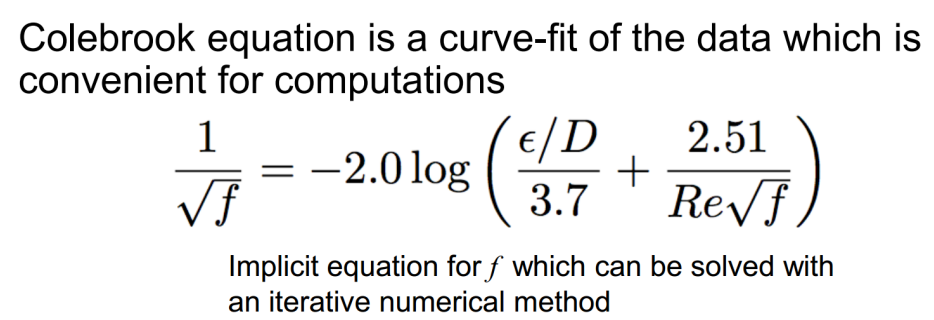
1. Study the bisection code below and answer the following questions
2. line 7, what is $g$? type the matematical expressions for $g=g(f)$
3. line 12-13, can I choose $x_l=0.012, x_u=0.013$? why?
4. line 15: can I define `error` here instead of `my_error`? why?
5. line 17: check the matlab help documentation `while`, and see how to use it. Can I write a code like this: `while(1)`?
6. line 19-20: if line 19 is changed to ` if colebrook(xl)*colebrook(xm) > 0 `, how should you change line 20? write your answer below.
7. line 30: what is a function handle? look at the matlab documentation with keywords `function handle` and define a function handle for $f(x)=x^2-4$
8. line 34: study the help documentation for builtin function `fzero`, can you use `fzero` to find the root for $f(x)=x^2-4$?
9. line 36-38: what is that? can i move these lines to the beginning of the script? why?
10. Convert the script file into a script and a separate function file for `colebrook.m`. In the script, you need to call function `colebrook`.
11. Can you write a function `bisectionSolver` to solve any given function `f`? the inputs and outputs are given
    ```
    function [ xr, my_error, it]=bisectionSolver(f, xl, xu, tol)


    end
    ```
    where `[xr,my_error,it]` are the approximated root, approximation error, and the number of iterations for bisection iterations. `(f,xl,xu,tol)` are the function handle, lower and upper bounds, and tolerance to stop bisection iteration. Test your `bisectionSolver` with function $f(x)=x^2-4$ with $x_l=0.5, x_u = 3, tol = 0.001$ 

my_error = 1.0000e-03
xacc = 0.011645


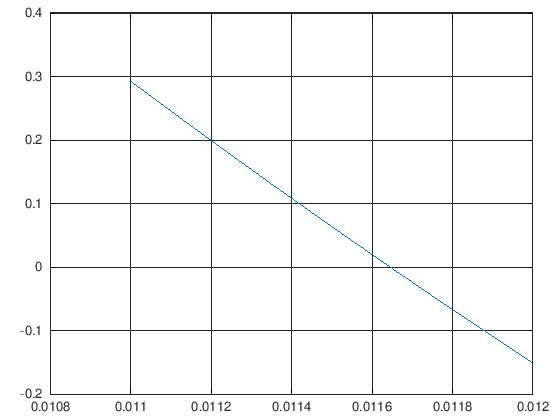

In [9]:
%% bidirection method to find approximated roots
% jifu tan

clear;clc; 

f = 0.011:.00001:0.012; % by plotting colebrook function, we know the root is within this range
g = colebrook(f); % evaluate the function 
figure;
plot(f,g) % plot to verify that the root is within the range,
grid on

xl = 0.011;  % lower point, colebrook(xl) >0
xu = 0.012;  % upper point, colebrook(xu) <0
tol = 1e-7;  % tolerance
my_error = abs(xu-xl) % error 

while (my_error > tol)  % while loop
    xm = 0.5*(xl+xu);    % middle point
    if colebrook(xl)*colebrook(xm)< 0  % check if these two differ in signs
        xu = xm;  % as colebrook(xu) is smaller than 0, so is colebrook(xm), so we can shift the upper bound from xu to xm
    elseif colebrook(xl)*colebrook(xm) == 0  % if it is zero, we found the root
        xr = xm; % set the root as xm
    else            % this is the case when colebrook(xl)*colebrook(xm) > 0
        xl = xm;  % shift the lower bound
    end
    xr = xm;  % get the root
    my_error = abs(xu -xl); % evaluate the error
end

g = @colebrook;  % define function handle

%% find the root using matlab built-in function fzero

xacc=fzero(g,xl) 

function [g]=colebrook(f)
g = 1./sqrt(f)+2*log10(2.51/1e6./sqrt(f));
end